# FINAL plots for Betti+2022b paper

all scripts written by Sarah Betti or Kate Follette for Betti+2022b

import functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from astropy.io import fits
from astropy import units as u
from astropy import constants as const

import warnings
warnings.simplefilter('ignore')

import os
import urllib.request


## colors for plots

In [2]:

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

var_line = 'tab:cyan'


## pull Kwan and Fischer tables from Will Fischer's website


In [3]:

urllib.request.urlretrieve('https://www.stsci.edu/~wfischer/KF11_CaseI.tar.gz', 'KF11.tgz')


('KF11.tgz', <http.client.HTTPMessage at 0x7f8500756580>)

In [4]:
#unpack tarball to local Colab 
!tar -xzf KF11.tgz

## read in aoyama data from Aoyama+2021
file received via private communication. 

In [5]:
#read in aoyama data
colnames_aoyama = ['v0','logn','Ha', 'Hb', 'Hg', 'Hd','PaB','PaG','BrG']
aoyama = pd.read_csv('flux_lines.dat', delim_whitespace=True, skiprows=1, names=colnames_aoyama)


## read in CASPAR
database in Betti+2023, in review.  Ask Sarah if needed for making Fig 4

In [6]:

caspar_fil = '../CASPAR/'
bd_update = pd.read_csv(caspar_fil+'Comprehensive Archive of Substellar and Planetary Accretion Rates (CASPAR) Betti+2023 - CASPAR.csv',skiprows=[1])

bd_orig = pd.read_csv(caspar_fil+'Comprehensive Archive of Substellar and Planetary Accretion Rates (CASPAR) Betti+2023 - Literature Database.csv',skiprows=[1])

bd_origCASPAR = bd_orig.sort_values(by=['Unique Name'], ignore_index=True)
bd_updateCASPAR = bd_update.sort_values(by=['Unique Name'], ignore_index=True)


## read in Delorme ABb files

In [7]:

datadir = 'Final_data/'
Delabb_final = fits.open(datadir + 'UT20211120/DelormeABb_UT20211120.fits')[0]
Delabb_final2 = fits.open(datadir + 'UT20220124/5FINAL_DelormeABb_UT20220124_040522.fits')[0]

Delab_final = fits.open(datadir + 'UT20220123/5FINAL_DelormeAB_V20220316_UT20220123.fits')[0]
Delab_final2 = fits.open(datadir + 'UT20220124/5FINAL_DelormeAB_UT20220124_030122.fits')[0]



## optical and NIR accretion rates derived from Alcala2017 and Aoyama2021 scaling relations

eriksson = values from Eriksson+2020
NIR1 = epoch 1
NIR2 = epoch 2

In [8]:
Mdot_eriksson = {'Hb':[-12.809668301829708, 0.37], 'Ha10':[-10.543633966870956, 0.26], 
                 'Ha alcala':[-12.490797477668897, 0.41], 'Ha Than':[-11.11690664142431, 0],
        'Ha aoyama':[-11.01999662841625, 0], 'HeI6678':[-12.6903698325741,0.64], 'HeI7065':[-12.3904055907747, 0.56]}

Mdot_NIR1 = {'PaG alcala':[-11.84341502,0.5223537143],'PaG aoyama':[-10.286539222056597,0.30298483270830917], 
            'PaB alcala':[-11.27079421,0.6149149689], 'PaB aoyama':[-10.369843755615722,0.30298483270830917],
            'BrG alcala':[-11.77682322,0.9468274717], 'BrG aoyama':[-10.255191511104245, 0.30298483270830917]}

Mdot_NIR2 = {'PaG alcala':[-12.30357762,0.5430529997],'PaG aoyama':[-10.604962523614912,0.30298483270830917], 
            'PaB alcala':[-11.65837707, 0.6369627971], 'PaB aoyama':[-10.685951090581105,0.30298483270830917],
            'BrG alcala':[-12.56832651, np.nan], 'BrG aoyama':[-10.822953040989407, np.nan]}


# Fig 1

In [9]:
# style features
fs=18
xlim_min, xlim_max = 0.95, 2.48
ylim_min, ylim_max = 0., 3.75
offset = 1

# set up bounds for adding spectral lines 
bound = []
bound.extend([xlim_min, xlim_max])
bound.extend([ylim_min, ylim_max])

# Lines with characteristics -- note: to get things looking right, you have to play with the order of the list
# items listed first are plotted closest to the spectrum and then it increases upward.  
# H lines = accretion
# HeI = infall/outflow
# CaH, VO, NaI, KI = surface gravity
# CaI, FeI, Mg, Al  = veiling
# H2, Fe2 = jets
# H2O, CO, FeH, Ch4 = spectral types
features=['k1', 'feh', 'vo','co','brg',  ]

# color of each feature. 
feature_colors = ['k', 'k','k','k','r',]
accretors_list = ['brg']

# epoch colors
Ca, Cb, Cc =  '#44AA99', '#332288','#AA3377'

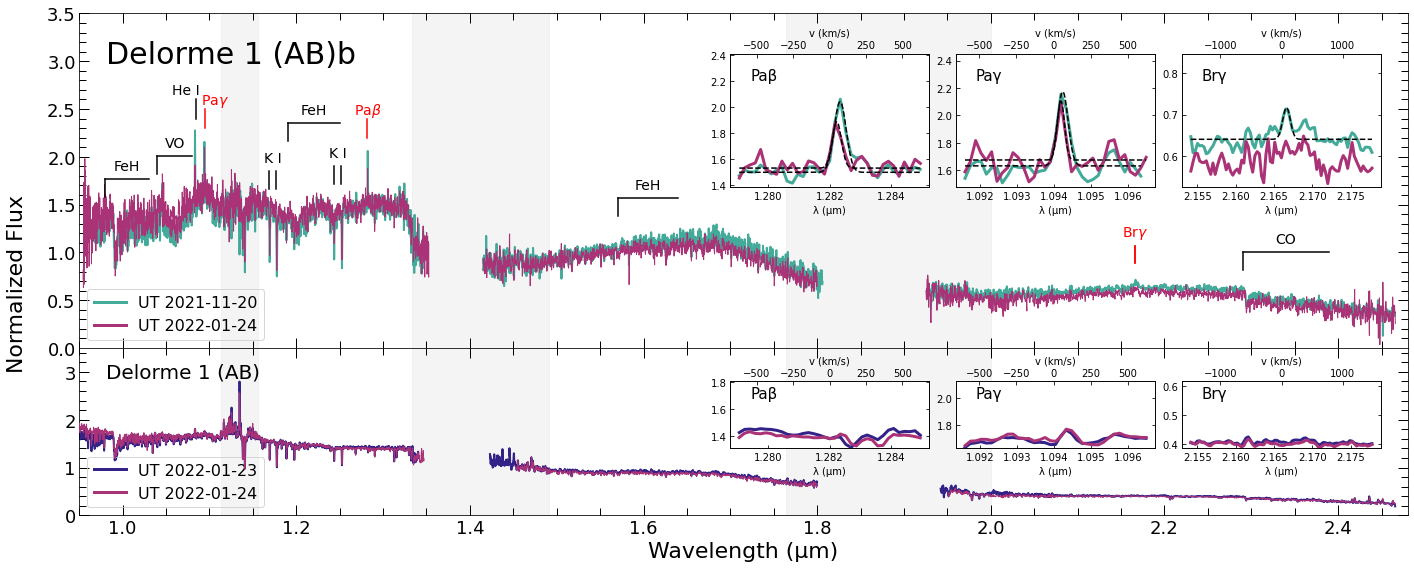

In [10]:
from finalplots_functions import *
%load_ext autoreload
%autoreload 2

%matplotlib inline
fig, (ax, ax2) = plt.subplots(figsize=(20,8), nrows=2, ncols=1, 
                              gridspec_kw=dict(height_ratios=[2,1]))

# axis labels
ax2.set_xlabel("Wavelength (μm)", fontsize=fs+4)
fig.supylabel('Normalized Flux', fontsize=fs+4)
ax.set_xticklabels([])

# objects names
ax.text(0.02, 0.85, 'Delorme 1 (AB)b', fontsize=30, transform=ax.transAxes)
ax2.text(0.02, 0.82, 'Delorme 1 (AB)', fontsize=20, transform=ax2.transAxes)
    
# plot spectra
plot_pretty(ax,  Delabb_final, Delabb_final2, Ca, Cc, bound, features, feature_colors, accretors_list,
            t=0.8, fs=fs, feats=True,
            label=['UT 2021-11-20', 'UT 2022-01-24'])

plot_pretty(ax2, Delab_final, Delab_final2, Cb, Cc, bound,
            feats=False, h=0.4, t=0.75, fs=fs,
            label=['UT 2022-01-23', 'UT 2022-01-24'])

# axis limits
ax2.set_ylim([ylim_min, 3.5])
ax.set_ylim(top=3.5)

# manually plot HeI and Pa lines/labels b/c auto messes them up
ax.plot([1.084,1.084], [2.4, 2.4+0.2], color='k')
ax.text(1.089, 2.4+0.25, 'He I', color='k', fontsize=14, ha='right')
ax.plot([1.095,1.095], [2.3, 2.3+0.2], color='r')
ax.text(1.09, 2.3+0.25, r'Pa$\gamma$', color='r', fontsize=14, ha='left')
ax.plot([1.282,1.282], [2.2, 2.2+0.2], color='r')
ax.text(1.282, 2.2+0.25, r'Pa$\beta$', color='r', fontsize=14, ha='center')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0, left=0.07)
# plt.savefig('/Users/sarah/Desktop/DelormeABandb.pdf', dpi=150)
plt.show()


# Fig 2

In [11]:
# JUPITER MASSES

Mdot_eriksson = {'Hb':[-9.79, 0.37], 'Ha10':[-7.52, 0.20], 
                 'Ha alcala':[-9.47, 0.51], 'Ha Than':[-8.10 ,0], 'Hb aoyama':[-8.74,0],
        'Ha aoyama':[-8 ,0], 'HeI6678':[-9.67, 0.64], 'HeI7065':[-9.37, 0.56]}

# orig/big BrG value
Mdot_NIR1 = {'PaG alcala':[-8.823233826771407,0.5223537143],'PaG aoyama':[-7.266358028828003,0.30298483270830917], 
            'PaB alcala':[-8.250613016771407,0.6149149689], 'PaB aoyama':[-7.34966256238713,0.30298483270830917],
            'BrG alcala':[-8.756642026771408,0.9468274717], 'BrG aoyama':[-7.235010317875653, 0.30298483270830917]}


Mdot_NIR2 = {'PaG alcala':[-9.283396426771407,0.5430529997],'PaG aoyama':[-7.584781330386319,0.30298483270830917], 
            'PaB alcala':[-8.638195876771407, 0.6369627971], 'PaB aoyama':[-7.665769897352512,0.30298483270830917],
            'BrG alcala':[-9.17, np.nan], 'BrG aoyama':[-7.53, np.nan]}



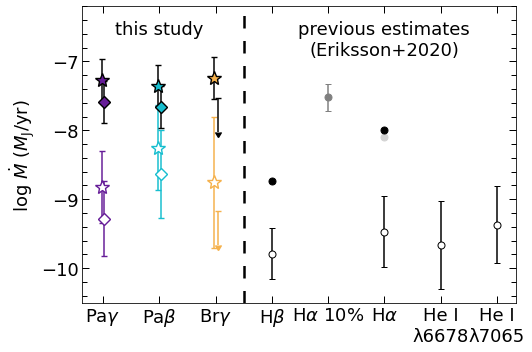

In [12]:

plt.figure(figsize=(7.5,5))

plt.errorbar(10, Mdot_eriksson['Ha alcala'][0], yerr=Mdot_eriksson['Ha alcala'][1], fmt='o', mec='k', capsize=3, mfc='white', ms=7, ecolor='k') #Alcala
plt.errorbar(10, Mdot_eriksson['Ha Than'][0],   yerr=Mdot_eriksson['Ha Than'][1], fmt='o',color='lightgray', capsize=3, ms=7)  #than
plt.errorbar(10, Mdot_eriksson['Ha aoyama'][0], yerr=Mdot_eriksson['Ha aoyama'][1], fmt='o', color='k', capsize=3, ms=7) #aoyama
plt.errorbar(6, Mdot_eriksson['Hb aoyama'][0], yerr=Mdot_eriksson['Hb aoyama'][1], fmt='o', color='k', capsize=3, ms=7) #aoyama


pos = [6,12,14]
Y = [Mdot_eriksson['Hb'][0], Mdot_eriksson['HeI6678'][0], Mdot_eriksson['HeI7065'][0]]
errY = [Mdot_eriksson['Hb'][1],  Mdot_eriksson['HeI6678'][1], Mdot_eriksson['HeI7065'][1]]
plt.errorbar(pos, Y, yerr=errY, fmt='o', mec='k', capsize=3, mfc='white', ms=7, ecolor='k')
plt.errorbar([8], Mdot_eriksson['Ha10'][0], yerr=Mdot_eriksson['Ha10'][1], 
             fmt='o', mec='gray', capsize=3, mfc='gray', ms=7, ecolor='gray',zorder=8)


color = [CB91_Violet, 'tab:cyan', CB91_Amber]
jj = [0,2, 4]
for i, line in enumerate(['PaG', 'PaB', 'BrG']):
    j = jj[i]
    plt.errorbar([j-0.05], Mdot_NIR1[f'{line} alcala'][0], yerr=Mdot_NIR1[f'{line} alcala'][1], 
                 capsize=3, fmt='*', ms=15,mfc='white',mec=color[i], mew=1.4, ecolor=color[i])
    
    plt.errorbar([j-0.05], Mdot_NIR1[f'{line} aoyama'][0], yerr=Mdot_NIR1[f'{line} aoyama'][1],
                 capsize=3, fmt='*', ms=15,mec='k',color=color[i], mew=1.4, ecolor='k')
    if line == 'BrG':
        plt.errorbar([j+0.07], Mdot_NIR2[f'{line} alcala'][0], yerr=[0.5], uplims=True,
                 color=color[i], marker='_', mew=1.4)
        plt.errorbar([j+0.07], Mdot_NIR2[f'{line} aoyama'][0], yerr=[0.5], uplims=True,
                 mfc=color[i], marker='_', mew=1.4, ecolor='k', mec='k')
    else:
        plt.errorbar([j+0.05], Mdot_NIR2[f'{line} alcala'][0], yerr=Mdot_NIR2[f'{line} alcala'][1],
                 capsize=3, fmt='D', ms=8,mfc='white',mec=color[i], mew=1.4, ecolor=color[i])
        plt.errorbar([j+0.05], Mdot_NIR2[f'{line} aoyama'][0], yerr=Mdot_NIR2[f'{line} aoyama'][1],
                     capsize=3, fmt='D', ms=8,mec='k',color=color[i], mew=1.4, ecolor='k')

method = ['Pa$γ$', 'Pa$β$', 'Br$γ$','H$β$', 'H$α$ 10%','H$α$','He I\nλ6678','He I\nλ7065' ]
plt.xticks([0,2,4,6,8,10,12, 14], method,rotation=0)

ls=18
plt.tick_params(which='major', top=True, bottom=True, right=True, length=7,direction='in', labelsize=ls, width=1)
plt.tick_params(which='minor', top=False, bottom=False, right=True, length=5,direction='in', labelsize=ls, width=1)
plt.minorticks_on()
plt.ylabel('log $\dot{M}$ ($M_\mathrm{J}$/yr)', fontsize=ls)
plt.tight_layout()
plt.axvline(5., color='k', linewidth=2.5, linestyle=(0, (5,5)))
plt.ylim(-10.5, -6.2)
plt.text(2., -6.4, 'this study', va='top', ha='center', fontsize=ls)
plt.text(10, -6.4, 'previous estimates\n(Eriksson+2020)', va='top', ha='center', fontsize=ls)

# plt.savefig('/Users/sarah/Desktop/Mdotvsline_jup_newerr.pdf', dpi=300, transparent=True)
plt.show()

# Fig 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
11.4 4.9
PaG/PaB

13.333333333333334 4.833333333333333
BrG/PaB

7.166666666666667 4.666666666666667
PaG/BrG

PaG/Ha





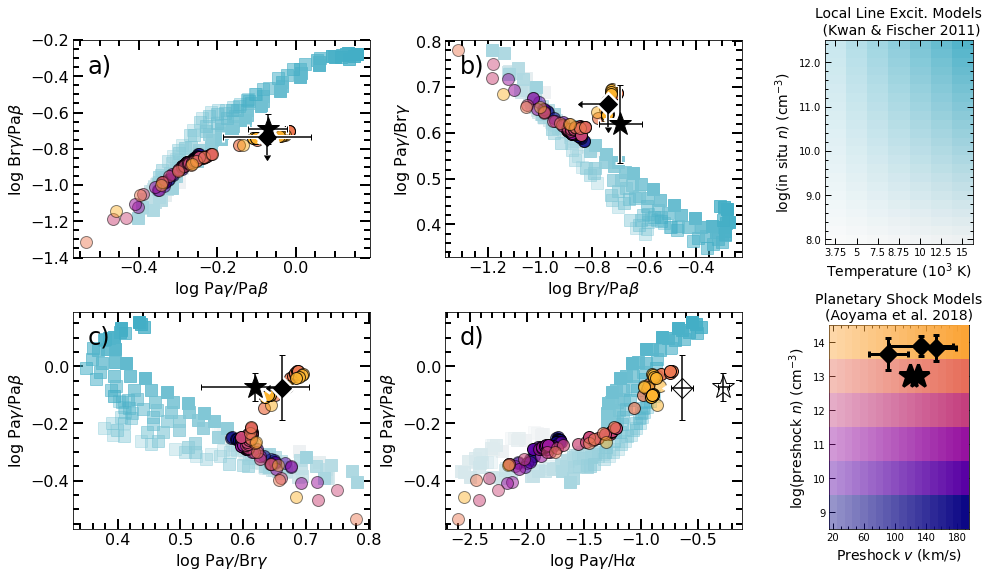

In [13]:
%matplotlib inline

from finalplots_functions import *
%load_ext autoreload
%autoreload 2

f1 = ratio_plot_4panel(aoyama, ['PaG/PaB','BrG/PaB','PaG/BrG', 'PaG/Ha'],
                ['BrG/PaB','PaG/BrG','PaG/PaB', 'PaG/PaB'], CMAP1='plasma', CMAP2='light:#3babc4',
                highlight=[9,5000, 11.0, 30],uncert=['R','R','L']) #'ch:start=.25,rot=.5',  'light:#5A9'

# Fig 4

In [14]:
Mdot_eriksson = {'Hb':[-12.809668301829708, 0.37], 'Ha10':[-10.543633966870956, 0.26], 
                 'Ha alcala':[-12.490797477668897, 0.41], 'Ha Than':[-11.11690664142431, 0],
        'Ha aoyama':[-11.01999662841625, 0], 'HeI6678':[-12.6903698325741,0.64], 'HeI7065':[-12.3904055907747, 0.56]}

# NEW ERRO METHOD
Mdot_NIR1 = {'PaG alcala':[-11.84341502,0.5223537143],'PaG aoyama':[-10.286539222056597,0.30298483270830917], 
            'PaB alcala':[-11.27079421,0.6149149689], 'PaB aoyama':[-10.369843755615722,0.30298483270830917],
            'BrG alcala':[-11.77682322,0.9468274717], 'BrG aoyama':[-10.255191511104245, 0.30298483270830917]}

Mdot_NIR2 = {'PaG alcala':[-12.30357762,0.5430529997],'PaG aoyama':[-10.604962523614912,0.30298483270830917], 
            'PaB alcala':[-11.65837707, 0.6369627971], 'PaB aoyama':[-10.685951090581105,0.30298483270830917],
            'BrG alcala':[-12.19, np.nan], 'BrG aoyama':[-10.55018, np.nan]}




In [15]:
for i, line in enumerate(['PaG', 'PaB', 'BrG']):
    print(10**Mdot_NIR1[f'{line} aoyama'][0], Mdot_NIR1[f'{line} aoyama'][1]*(10**Mdot_NIR1[f'{line} aoyama'][0])/0.434)

for i, line in enumerate(['PaG', 'PaB', 'BrG']):
    print(10**Mdot_NIR2[f'{line} aoyama'][0], Mdot_NIR2[f'{line} aoyama'][1]*(10**Mdot_NIR2[f'{line} aoyama'][0])/0.434)


   

5.169645676927986e-11 3.609042005956819e-11
4.2673301521427024e-11 2.979115926861936e-11
5.5565917387013365e-11 3.8791774617022976e-11
2.4833473904675356e-11 1.7336787872290838e-11
2.060861990561084e-11 1.4387325471084401e-11
2.8172150513297425e-11 nan


5.169645676927986e-11
3.609042005956819e-11
4.2673301521427024e-11
2.979115926861936e-11
5.5565917387013365e-11
3.8791774617022976e-11


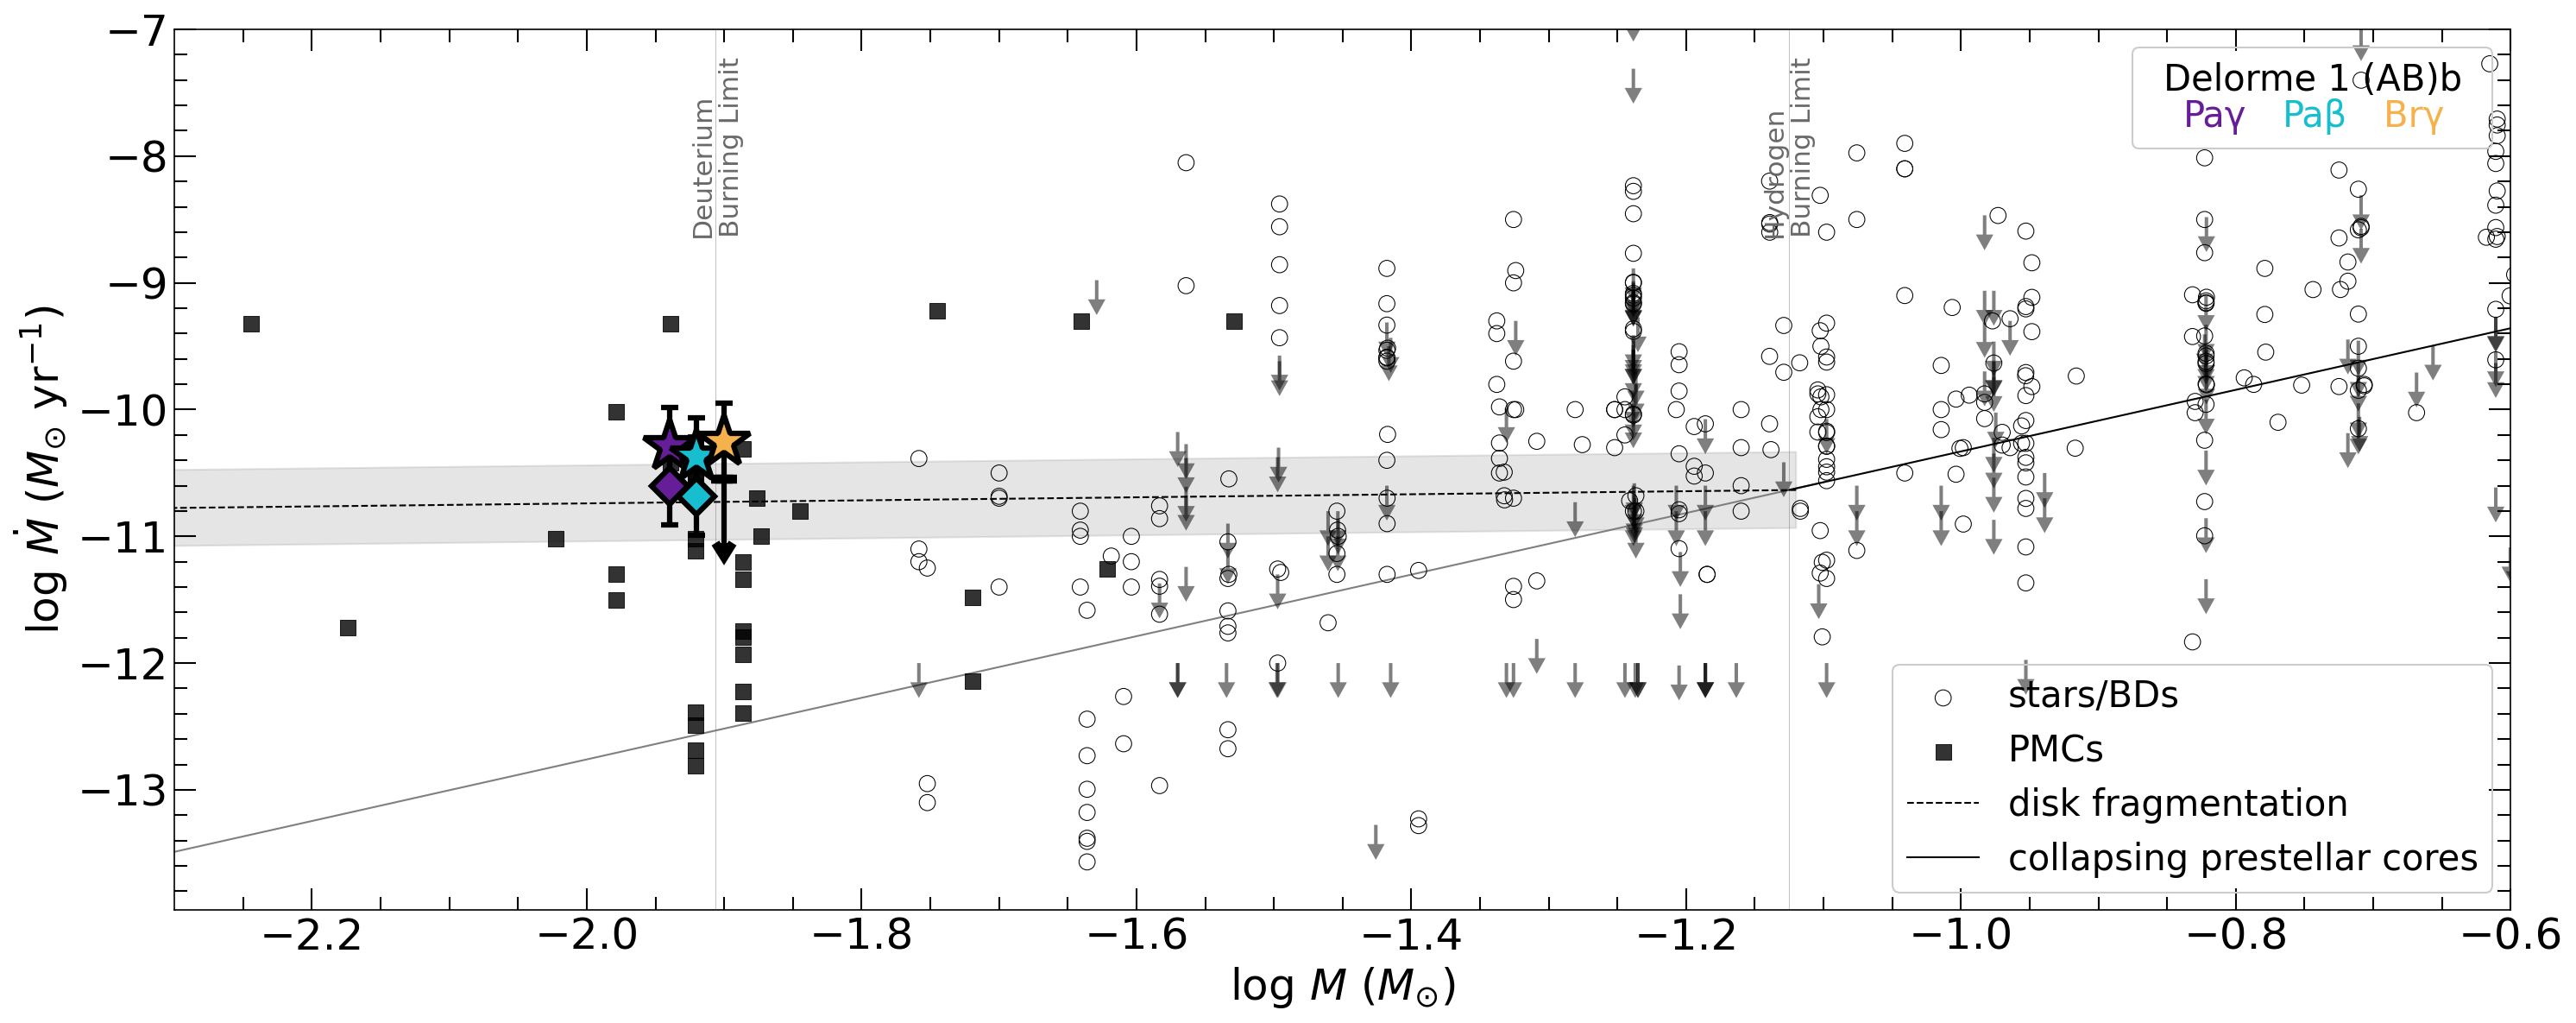

In [16]:

fig = plt.figure(figsize=(20,8), dpi=150)
ax = plt.subplot()

DB = bd_update.loc[(bd_update['Mass'] > 13 * .0009543) & (bd_update['Companion'] != 'COM')]
UPP = DB.loc[DB['Upper Limit'] == 'UPP']
norm = DB.loc[DB['Upper Limit'] != 'UPP']
XXnorm, YYnorm = np.log10(norm['Mass']), np.log10(norm['Accretion Rate'])
XXupp, YYupp = np.log10(UPP['Mass']), np.log10(UPP['Accretion Rate'])
ax.scatter(XXnorm, YYnorm, s=80, edgecolor='k', facecolor='none', alpha=1, lw=.5, label='stars/BDs')
u = np.zeros_like(XXupp)
v = -np.ones_like(XXupp)
ax.quiver(XXupp, YYupp, u,v,  headwidth=5, headlength=4.5, width=.01, scale=10, alpha=0.5, color='k', units='xy')

name = 'COM'
X = np.log10(bd_orig['Mass'].loc[(bd_orig['Companion']==name)])
Y = np.log10(bd_orig['Accretion Rate'].loc[(bd_orig['Companion']==name)])
ax.scatter(X,Y, marker='s', s=80, facecolor='k', edgecolor='k', linewidth=0.5,alpha=0.8, 
           label='PMCs')

ax.annotate('Hydrogen\nBurning Limit', (-1.145, -8.6), color = 'dimgray', 
            rotation = 90, fontsize = 15, ha='left', backgroundcolor='none', zorder=3)
ax.annotate('Deuterium\nBurning Limit', (-1.925, -8.6), color = 'dimgray', 
            rotation = 90, fontsize = 15, ha='left', backgroundcolor='none', zorder=3)
ax.axvline(x = np.log10(0.075), color = 'dimgray', linestyle='-', alpha=0.4, linewidth=0.5, zorder=4)
ax.axvline(x = np.log10(13 * .0009543), color = 'dimgray', linestyle='-', alpha=0.4, linewidth=0.5, zorder=4)

x = np.linspace(-5.5,-1.12,10)
y=-10.5+0.12*x
line1, = ax.plot(x,y,color='k',ls='--', label="disk fragmentation", zorder=4, linewidth=1)

ax.fill_between(x, y-0.3, y+0.3, color='gray', alpha=0.2, zorder=-1)

x = np.arange(np.log10(0.075),1,0.1)
y2=2.43*x-7.9
line2, = ax.plot(x,y2,color='k', label="collapsing prestellar cores", zorder=4, linewidth=1)
x = np.arange(-5.5,np.log10(0.075)+0.1,0.1)
y2=2.43*x-7.9
line2, = ax.plot(x,y2,color='gray', alpha=1, zorder=-3, linewidth=1)

h, l = ax.get_legend_handles_labels()
handles = [h[0], h[1], h[2], h[3]]
labels = [l[0], l[1], l[2], l[3]]
leg1 = ax.legend(ncol=1, loc='lower right', fontsize=20, framealpha=1, facecolor='none')
ax.add_artist(leg1)

# color=[CB91_Violet,'tab:cyan',CB91_Amber]
offset = [-0.02, 0, 0.02]
label = ['Paγ', 'Paβ', 'Brγ   ']
for i, line in enumerate(['PaG', 'PaB', 'BrG']):
    print(10**Mdot_NIR1[f'{line} aoyama'][0])
    print(Mdot_NIR1[f'{line} aoyama'][1]*(10**Mdot_NIR1[f'{line} aoyama'][0])/0.434)
    ax.errorbar([-1.92+offset[i]],Mdot_NIR1[f'{line} aoyama'][0], yerr=Mdot_NIR1[f'{line} aoyama'][1], 
                fmt='*', ms=30, mfc=color[i],
                mec='k', mew=3,lw=3, zorder=120, ecolor='k',label=label[i], capsize=5)
    if line == 'BrG':
        ax.errorbar([-1.92+offset[i]], Mdot_NIR2[f'{line} aoyama'][0], yerr = [0.5], 
                    uplims=True,mec='k', marker='_', mew=5, lw=3, ecolor='k', zorder=140, ms=14,capsize=5)
        ax.errorbar([], [], yerr=[], fmt='D', ms=14, mfc=CB91_Amber, mec='k', mew=3)
    else:
        ax.errorbar([-1.92+offset[i]],Mdot_NIR2[f'{line} aoyama'][0], yerr=Mdot_NIR2[f'{line} aoyama'][1], 
                    fmt='D', ms=14, mfc=color[i],
                    mec='k', mew=3,lw=3, zorder=120, ecolor= 'k',capsize=5)

h, l = ax.get_legend_handles_labels()
handles = [h[4], h[5], h[6]]
labels = [l[4], l[5], l[6]]
handles = [h[0] for h in handles]

leg2 = ax.legend(handles, labels, ncol=3, loc='upper right', fontsize=20, 
                 framealpha=1, columnspacing=0,labelspacing=0,handlelength=1,
                 handletextpad=0, title_fontsize=20,markerscale=0.0, title='Delorme 1 (AB)b', 
                labelcolor=[CB91_Violet, 'tab:cyan', CB91_Amber], facecolor='none')
ax.set_xlim(-2.3, -0.6)    
ax.set_ylim(-13.95, -7)
ax.set_xlabel('log $M$ ($M_{\odot})$', fontsize = 24)
ax.set_ylabel('log $\dot{M}$ ($M_{\odot}\ \mathrm{yr}^{-1}$)', fontsize = 24)
ax.tick_params(which='major', direction='in', top=True, right=True,left=True, bottom=True, labelsize=24, length=12, width=1)
ax.tick_params(which='minor', direction='in', top=True,bottom=True, right=True, left=True, labelsize=24, length=7, width=1)
ax.minorticks_on()
plt.tight_layout()
# plt.savefig('/Users/sarah/Desktop/MMdot_DelNIR_newerr.pdf', dpi=300, transparent=True)

plt.show()